# 9. Сортирање, филтрирање и фреквенцијска анализа

У овој лекцији ћемо говорити о:
1. преуређивању редова табеле како би се поређали по величини по неком критеријуму (_сортирање_);
2. издвајању редова табеле који задовољавају неке услове (_филтрирање_); и
3. бројању редова табеле који имају неке особине (_фреквенцијска анализа_).

## 9.1. Сортирање података

_Сортирати податке_ значи поређати их по величини. Да бисмо видели како се то ради у библиотеци _pandas_ прво ћемо учитати библиотеку:

In [1]:
import pandas as pd

а онда ћемо направити табелу са подацима о групи деце коју смо већ користили, колонама ћемо дати одговарајућа имена и индексираћемо табелу именима деце:

In [2]:
podaci = [["Ana",     "ž", 13, 46, 160],
          ["Bojan",   "m", 14, 52, 165],
          ["Vlada",   "m", 13, 47, 157],
          ["Gordana", "ž", 15, 54, 165],
          ["Dejan",   "m", 15, 56, 163],
          ["Đorđe",   "m", 13, 45, 159],
          ["Elena",   "ž", 14, 49, 161],
          ["Žaklina", "ž", 15, 52, 164],
          ["Zoran",   "m", 15, 57, 167],
          ["Ivana",   "ž", 13, 45, 158],
          ["Jasna",   "ž", 14, 51, 162]]
tabela = pd.DataFrame(podaci)
tabela.columns=["Ime", "Pol", "Starost", "Masa", "Visina"]
tabela1 = tabela.set_index("Ime")

Ево како табела изгледа:

In [3]:
tabela1

,Pol,Starost,Masa,Visina
Ime,,,,
Ana,ž,13,46,160
Bojan,m,14,52,165
Vlada,m,13,47,157
Gordana,ž,15,54,165
Dejan,m,15,56,163
Đorđe,m,13,45,159
Elena,ž,14,49,161
Žaklina,ž,15,52,164
Zoran,m,15,57,167


Хајде сада да сортирамо табелу по висини употребом функције `sort_values` (енгл. _sort_ значи "сортирај, поређај по величини", док _values_ значи "вредности").

Овој функцији морамо да кажемо по ком критеријуму се сортирају подаци (по висини, тежини, старости, ...) тако што име одговарајуће колоне наведемо као вредност аргумента `by` (енгл. реч "by" значи свашта, али у овом контексту значи "према").

Функција не мења полазну табелу, већ од ње прави нову:

In [4]:
tabela1_po_visini = tabela1.sort_values(by="Visina")
tabela1_po_visini

,Pol,Starost,Masa,Visina
Ime,,,,
Vlada,m,13,47,157
Ivana,ž,13,45,158
Đorđe,m,13,45,159
Ana,ž,13,46,160
Elena,ž,14,49,161
Jasna,ž,14,51,162
Dejan,m,15,56,163
Žaklina,ž,15,52,164
Bojan,m,14,52,165


Пошто нисмо навели како желимо да сортирамо податке (од најмањег ка највећем, или обрнуто) подаци су сортирани од најмањег ка највећем. Уколико желимо да сортирамо табелу по висини, али од највеће ка најмањој, потребно је то нагласити користећи параметар `ascending=False` (енгл. _ascending_ значи "растуће").

In [5]:
tabela1_po_visini = tabela1.sort_values(by="Visina", ascending=False)
tabela1_po_visini

,Pol,Starost,Masa,Visina
Ime,,,,
Zoran,m,15,57,167
Bojan,m,14,52,165
Gordana,ž,15,54,165
Žaklina,ž,15,52,164
Dejan,m,15,56,163
Jasna,ž,14,51,162
Elena,ž,14,49,161
Ana,ž,13,46,160
Đorđe,m,13,45,159


Хајде, за крај, да прикажемо податке из овако сортиране табеле.

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(tabela1_po_visini.index, tabela1_po_visini["Visina"], label="Visina")
plt.bar(tabela1_po_visini.index, tabela1_po_visini["Masa"], label="Masa")
plt.title("Visina i masa dece u grupi")
plt.legend()
plt.show()
plt.close()

<Figure size 1000x500 with 1 Axes>

## 9.2. Филтрирање података

Често је из табеле потребно издвојити редове који имају неке особине. На пример, ако желимо да издвојимо само оне редове табеле у којима су наведени подаци о девојчицама, то можемо урадити на следећи начин:

    tabela1[tabela1.Pol == "ž"]

Овај израз ће из табеле `tabela1` издвојити све редове код којих у колони "Pol" пише "ž". (Обратите пажњу на то да се приликом формирања критеријума у изразу `tabela1.Pol` не пишу наводници! Не питајте зашто...)

In [7]:
devojke = tabela1[tabela1.Pol == "ž"]
devojke

,Pol,Starost,Masa,Visina
Ime,,,,
Ana,ž,13,46,160
Gordana,ž,15,54,165
Elena,ž,14,49,161
Žaklina,ž,15,52,164
Ivana,ž,13,45,158
Jasna,ž,14,51,162


На сличан начин можемо да издвојимо сву децу која имају преко 50 кг:

In [8]:
preko_50kg = tabela1[tabela1.Masa > 50]
preko_50kg

,Pol,Starost,Masa,Visina
Ime,,,,
Bojan,m,14,52,165
Gordana,ž,15,54,165
Dejan,m,15,56,163
Žaklina,ž,15,52,164
Zoran,m,15,57,167
Jasna,ž,14,51,162


Критеријуме можемо и да комбинујемо. На пример, ако желимо да из табеле извучемо податке о свим дечацима са највише 55 кг треба из табеле да издвојимо податке који задовољавају два критеријума:

    Masa <= 55  и  Pol == "m".

Логички везник "и" се у библиотеци `pandas` означава симболом `&`. Према томе, податке добијамо тако што табели проследимо следећи захтев за филтрирање:

In [9]:
decaci_do_55kg = tabela1[(tabela1.Masa <= 55) & (tabela1.Pol == "m")]
decaci_do_55kg

,Pol,Starost,Masa,Visina
Ime,,,,
Bojan,m,14,52,165
Vlada,m,13,47,157
Đorđe,m,13,45,159


Приказаћемо, за крај, податке о маси и висини ових дечака једним графиконом:

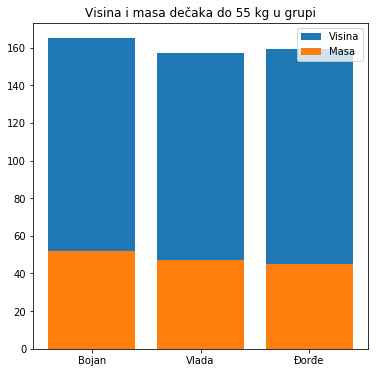

In [10]:
plt.figure(figsize=(6,6))
plt.bar(decaci_do_55kg.index, decaci_do_55kg["Visina"], label="Visina")
plt.bar(decaci_do_55kg.index, decaci_do_55kg["Masa"], label="Masa")
plt.title("Visina i masa dečaka do 55 kg u grupi")
plt.legend()
plt.show()
plt.close()

## 9.3. Фреквенцијска анализа


Да се подсетимо, фреквенцијска анализа низа података се своди на то да се преброји колико се пута који податак појављује у низу.  Док смо раније морали доста тога сами да урадимо, библиотека `pandas` има функцију `value_counts` која врши фреквенцијску анализу (енгл. _value_ значи "вредност", док _count_ значи "бројати"; дакле, пребројати вредности).

Ево примера. Ако у табели са којом радимо желимо да пребројимо дечаке и девојчице, то можемо учинити позивом функције `value_counts` овако:

In [11]:
tabela1["Pol"].value_counts()

ž    6
m    5
Name: Pol, dtype: int64

Функција `value_counts` је у колони "Pol" пребројала све вредности и утврдила да се у тој колони вредност "ž" појављује 6 пута, док се вредност "m" појављује 5 пута.

Ако желимо да утврдимо старосну структуру групе, применићемо функцију `value_counts` на колону "Starost":

In [12]:
tabela1["Starost"].value_counts()

15    4
13    4
14    3
Name: Starost, dtype: int64

Функција `value_counts` је у колони "Starost" пребројала све вредности и утврдила да се у тој колони вредности 15 и 13 појављују по 4 пута, док се вредност 14 појављује 3 пута.

Ако резултат рада функције `value_counts` сместимо у променљиву:

In [13]:
frekv = tabela1["Pol"].value_counts()
frekv

ž    6
m    5
Name: Pol, dtype: int64

онда можемо лако да реконструишемо које су вредности уочене у табели, и које су њихове фреквенције. Наиме,

    frekv.index
    
нам даје листу уочених вредности, док
    
    frekv.values

даје њихове фреквенције.

In [14]:
print("Vrednosti koje se javljaju u koloni:", frekv.index)
print("Njihove frekvencije:", frekv.values)

Vrednosti koje se javljaju u koloni: Index(['ž', 'm'], dtype='object')
Njihove frekvencije: [6 5]


Полну структуру ове групе деце можемо да прикажемо секторским дијаграмом овако:

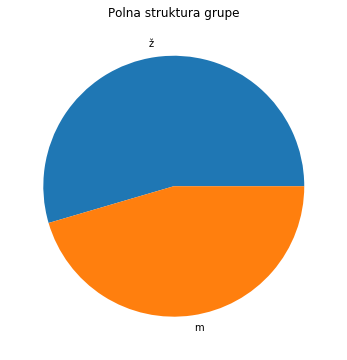

In [15]:
import matplotlib.pyplot as plt
frekv = tabela1["Pol"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(frekv.values, labels=frekv.index)
plt.title("Polna struktura grupe")
plt.show()
plt.close()

На сличан начин можемо да прикажемо старосну структуру групе:

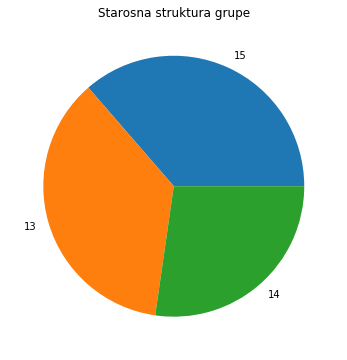

In [16]:
frekv = tabela1["Starost"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(frekv.values, labels=frekv.index)
plt.title("Starosna struktura grupe")
plt.show()
plt.close()

На адреси

    https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv
    
се налази јавно доступан списак свих држава на свету. Ову табелу можемо лако учитати наредбом `read_csv`:

In [17]:
drzave = pd.read_csv("https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv")
drzave.head(5)

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Број држава по континентима можемо видети овако:

In [18]:
drzave["Region"].value_counts()

AFRICA           54
EUROPE           47
ASIA             44
NORTH AMERICA    23
OCEANIA          14
SOUTH AMERICA    12
Name: Region, dtype: int64

Прикажимо број држава по континентима секторским дијаграмом:

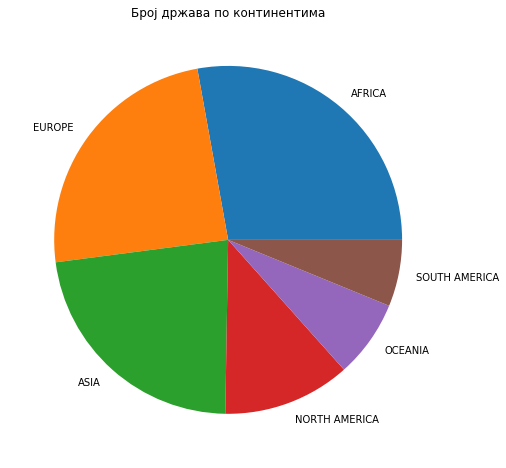

In [19]:
import matplotlib.pyplot as plt
po_kontinentima = drzave["Region"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(po_kontinentima.values, labels=po_kontinentima.index)
plt.title("Број држава по континентима")
plt.show()
plt.close()

## 9.4. Задаци

Задатке реши у Џупајтеру.

**Задатак 1.** Погледај програм и дијаграм, па одговори на следећа питања:

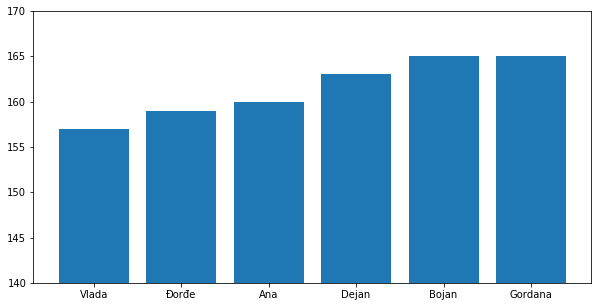

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

podaci = [["Ana",     "ž", 13, 46, 160],
          ["Bojan",   "m", 14, 52, 165],
          ["Vlada",   "m", 13, 47, 157],
          ["Gordana", "ž", 15, 54, 165],
          ["Dejan",   "m", 15, 56, 163],
          ["Đorđe",   "m", 13, 45, 159]]

tabela = pd.DataFrame(podaci)
tabela.columns=["Ime", "Pol", "Starost", "Masa", "Visina"]
tabela1=tabela.set_index("Ime")

tabela_po_visini = tabela1.sort_values(by="Visina")

plt.figure(figsize=(10,5))
plt.bar(tabela_po_visini.index, tabela_po_visini["Visina"])
plt.ylim(140,170)
plt.show()
plt.close()

1. Зашто стубићи на дијаграму расту када то није случај са подацима у листи `podaci`?
2. Шта треба изменити у програму да бисмо добили графикон који опада?

**Задатак 2.** У датотеци _podaci/RekeSrbije.csv_ наведене су најдуже реке Србије, њихова укупна дужина у км, и дужина тока кроз Србију у км.

_(а)_ Учитај податке у табелу (табела има заглавље), и прикажи првих неколико редова табеле.

 
_(б)_ Сортирај табелу по дужини тока реке кроз Србију.

_(в)_ За наведене реке прикажи линијским дијаграмом укупну дужину, и дужину тока реке кроз Србију.

_(г)_ Од дате табеле направи нову у којој су издвојене само оне реке које бар половину свог тока протичу кроз Србију, па тако добијену табелу упиши у датотеку _podaci/Reke2.csv_ водећи рачуна о томе да су неки подаци у табели записани ћирилицом.

**Задатак 3.** Нутритивни подаци за неке рибе и морске плодове су дати у следећој табели:

| Намирница (100г) | Енергетска вредност (kcal) | Угљени хидрати (г) | Беланчевине (г) | Масти (г) |
|--|--|--|--|--|
|Туна|116|0|26|1|
|Ослић|88|0|17.2|0.8|
|Пастрмка|119|0|18|5|
|Лосос|116|0|20|3.5|
|Скуша|205|0|19|14|
|Сардине|135|0|18|5|
|Харинга|158|0|18|9|
|Бакалар|82|0|18|0.7|
|Сом|95|0|16.4|2.8|
|Шаран|127|0|17.6|5.6|
|Орада|115|0|16.5|5.5|
|Јегуља|184|0|18.4|11.7|
|Шкампи|106|1|20|2|
|Дагње|86|4|12|2|
|Козице|71|1|13|1|
|Лигње|92|3|15.6|1.3|
|Хоботница|81|0|16.4|0.9|
|Јастог|112|0|20|1.5|

Подаци из табеле су представљени листом у ћелији испод:

In [21]:
# изврши ову ћелију
morski_plodovi = [
  ["Туна", 116, 0, 26, 1],
  ["Ослић", 88, 0, 17.2, 0.8],
  ["Пастрмка", 119, 0, 18, 5],
  ["Лосос", 116, 0, 20, 3.5],
  ["Скуша", 205, 0, 19, 14],
  ["Сардине", 135, 0, 18, 5],
  ["Харинга", 158, 0, 18, 9],
  ["Бакалар", 82, 0, 18, 0.7],
  ["Сом", 95, 0, 16.4, 2.8],
  ["Шаран", 127, 0, 17.6, 5.6],
  ["Орада", 115, 0, 16.5, 5.5],
  ["Јегуља", 184, 0, 18.4, 11.7],
  ["Шкампи", 106, 1, 20, 2],
  ["Дагње", 86, 4, 12, 2],
  ["Козице", 71, 1, 13, 1],
  ["Лигње", 92, 3, 15.6, 1.3],
  ["Хоботница", 81, 0, 16.4, 0.9],
  ["Јастог", 112, 0, 20, 1.5]]

_(а)_ Од ове листе у ћелији испод направи _DataFrame_ и дај колонама табеле погодна имена. Предлажемо да свакој колони даш име које ће бити само једна реч (рецимо "Намирница", "ЕнергВр", "УХ", "Бел", "Масти") како би у каснијим задацима лакше именовао колоне табеле.

_(б)_ Сортирај табелу по енергетској вредности намирнице од највеће ка најмањој вредности и прикажи хистограмом тако сортиране енергетске вредности.

_(в)_ Од овако сортиране табеле направи нову у којој су само оне намирнице које не садрже угљене хидрате и имају мање од 10 г масти на 100 г намирнице.

_(г)_ Направи фреквенцијску анализу ових података према количини угљених хидрата и прикажи резултате анализе секторским дијаграмом.

**Задатак 4.** Ученици једног разреда су скакали у даљ. Сваки ученик је скакао три пута и резултати су дати у датотеци _SkokUDalj.csv_ која се налази у фолдеру _podaci_. Табела има заглавље и састоји се од четири колоне: "Презиме и име", "Скок1", "Скок2" и "Скок3".

_(а)_ Учитај датотеку у структуру података _DataFrame_.

_(б)_ Додај табели нову колону "Макс" и онда за сваког ученика израчунај и у ту колону упиши његов најбољи скок.

_(в)_ Сортирај табелу по колони "Макс" и прикажи првих пет редова тако сортиране табеле (да видимо ко су најбољи скакачи у разреду).

_(г)_ Издвој из табеле оне редове који садрже ученике који су начинили бар један преступ. Преступ је у табели означен тако што је дужина одговарајућег скока постављена на 0.

**Задатак 5.** У наредној ћелији се налазе подаци о неколико ученика. За сваког ученика је наведено његово презиме, име, ЈМБГ, пол, разред који похађа и просек на крају тог разреда:

In [22]:
# изврши ову ћелију
podaci = [
    ["Петровић",  "Петар", "0308003800019", "м", 8, 4.52],
    ["Јаснић",    "Јасна", "1210003805026", "ж", 8, 5.00],
    ["Аничић",    "Аница", "1105004805019", "ж", 7, 4.11],
    ["Веснић",    "Весна", "2901005705011", "ж", 6, 5.00],
    ["Ђорђевић",  "Ђорђе", "1504005700012", "м", 6, 3.12],
    ["Милошев",   "Милош", "1506004400056", "м", 7, 2.51],
    ["Милошев",   "Петар", "1506004400057", "м", 7, 2.48],
    ["Ненадовић", "Ненад", "2109003800046", "м", 8, 3.58],
    ["Ненадовић", "Јасна", "2109003805021", "ж", 8, 4.21]]

_(а)_ Формирај одговарајућу табелу позивом функције _DataFrame_.

_(б)_ Прикажи секторским дијаграмом полну структуру ове групе.

_(в)_ Прикажи секторским дијаграмом старосну структуру ове групе узимајући у обзир разред који је ученик завршио.

_(г)_ Коју колону је најбоље одабрати као кључ за индексирање ове табеле? У ћелији испод ове направи нову табелу која се добија индексирањем претходне табеле одабраном колоном.

_(д)_ Шта мислиш, зашто сваки држављанин наше државе има ЈМБГ?

_(ђ)_ Направи нову табелу коју чине само ученици осмог разреда.

_(е)_ Направи нову табелу коју чине само врло добри ученици.

_(ж)_ Направи нову табелу коју чине само дечаци који нису одлични.

**Задатак 6.** На адреси

    https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv

се налази јавно доступна табела са списком држава света и неким параметрима економског развоја тих држава праћеним у интервалима од 5 година.

Табела има следеће колоне:

* country = држава
* year = година на коју се односе подаци
* pop = број становника (енгл. _population_)
* continent = континент
* lifeExp = очекивани животни век у годинама (енгл. _life expextancy_)
* gdpPercap = БДП по глави становника у америчким доларима (енгл. _GDP per capitem_)

_(а)_ Учитај ову табелу у структуру података _DataFrame_.

_(б)_ У нову табелу издвој податке који се односе на Србију (Упутство: `tabela[tabela.country == "Serbia"]`)

_(в)_ Прикажи линијским дијаграмом како се мењао очекивани животни век грађана Србије за године за које постоје подаци у табели.

_(г)_ Прикажи хистограмом како се мењао БДП по глави становника Србије за године за које постоје подаци у табели.

_(д)_ Табелу која се односи на Србију упиши у датотеку _FYDSerbia.csv_ (сви подаци у табели су записани енглеским алфабетом па нема муке око система за кодирање података), али тако да у датотеку не упишемо индексну колону.